
##### M13_Challenge_KonradK_venture_funding_with_deep_learning.ipynb
## Konrad Kozicki
### UCB-VIRT-FIN-PT-12-2020-U-B-TTH
# Module 13 Challenge Submission - Sandbox_01
---

# Venture Funding with Deep Learning


In [1]:
# Imports
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame
applicant_data_df = pd.read_csv(
    Path("./Resources/applicants_data.csv")
)

# # Review the DataFrame
# applicant_data_df.head()

In [3]:
# Review the data types associated with the columns
applicant_data_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

>>>> 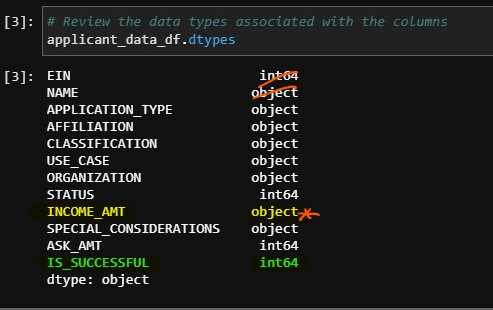

In [4]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame
applicant_data_df = applicant_data_df.drop(columns = ["EIN", "NAME"])

# Review the DataFrame
applicant_data_df[:15]

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0               T10       Independent          C1000    ProductDev   
1                T3       Independent          C2000  Preservation   
2                T5  CompanySponsored          C3000    ProductDev   
3                T3  CompanySponsored          C2000  Preservation   
4                T3       Independent          C1000     Heathcare   
5                T3       Independent          C1200  Preservation   
6                T3       Independent          C1000  Preservation   
7                T3       Independent          C2000  Preservation   
8                T7       Independent          C1000    ProductDev   
9                T5  CompanySponsored          C3000    ProductDev   
10               T3       Independent          C1200  Preservation   
11               T3       Independent          C2000  Preservation   
12               T3  CompanySponsored          C1200  Preservation   
13               T3       Independent          C2700  Preservation   
14               T3       Independent          C1000  Preservation   

    ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0    Association       1              0                      N     5000   
1   Co-operative       1         1-9999                      N   108590   
2    Association       1              0                      N     5000   
3          Trust       1    10000-24999                      N     6692   
4          Trust       1  100000-499999                      N   142590   
5          Trust       1              0                      N     5000   
6          Trust       1  100000-499999                      N    31452   
7          Trust       1        10M-50M                      N  7508025   
8          Trust       1         1-9999                      N    94389   
9    Association       1              0                      N     5000   
10         Trust       1    25000-99999                      N    69656   
11         Trust       1  100000-499999                      N   165593   
12   Association       1              0                      N     5000   
13         Trust       1    25000-99999                      N     5301   
14         Trust       1              0                      N     5000   

    IS_SUCCESSFUL  
0               1  
1               1  
2               0  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               0  
10              0  
11              0  
12              1  
13              1  
14              1

In [5]:
# Drop the other columns from the DataFrame as needed
applicant_data_df_cropped = applicant_data_df.drop(columns = ["SPECIAL_CONSIDERATIONS"])


#.drop(columns = ["AFFILIATION", "APPLICATION_TYPE", "CLASSIFICATION", "ORGANIZATION", "INCOME_AMT", "ASK_AMT", "STATUS", "USE_CASE", "SPECIAL_CONSIDERATIONS"])

# # Review the DataFrame
applicant_data_df_cropped[:15]

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0               T10       Independent          C1000    ProductDev   
1                T3       Independent          C2000  Preservation   
2                T5  CompanySponsored          C3000    ProductDev   
3                T3  CompanySponsored          C2000  Preservation   
4                T3       Independent          C1000     Heathcare   
5                T3       Independent          C1200  Preservation   
6                T3       Independent          C1000  Preservation   
7                T3       Independent          C2000  Preservation   
8                T7       Independent          C1000    ProductDev   
9                T5  CompanySponsored          C3000    ProductDev   
10               T3       Independent          C1200  Preservation   
11               T3       Independent          C2000  Preservation   
12               T3  CompanySponsored          C1200  Preservation   
13               T3       Independent          C2700  Preservation   
14               T3       Independent          C1000  Preservation   

    ORGANIZATION  STATUS     INCOME_AMT  ASK_AMT  IS_SUCCESSFUL  
0    Association       1              0     5000              1  
1   Co-operative       1         1-9999   108590              1  
2    Association       1              0     5000              0  
3          Trust       1    10000-24999     6692              1  
4          Trust       1  100000-499999   142590              1  
5          Trust       1              0     5000              1  
6          Trust       1  100000-499999    31452              1  
7          Trust       1        10M-50M  7508025              1  
8          Trust       1         1-9999    94389              1  
9    Association       1              0     5000              0  
10         Trust       1    25000-99999    69656              0  
11         Trust       1  100000-499999   165593              0  
12   Association       1              0     5000              1  
13         Trust       1    25000-99999     5301              1  
14         Trust       1              0     5000              1

In [6]:
# Create a list of categorical variables 
categorical_variables_cropped = list(applicant_data_df_cropped.dtypes[applicant_data_df_cropped.dtypes == "object"].index)

# Display the categorical variables list
categorical_variables_cropped

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

In [8]:
# Encode the categorcal variables using OneHotEncoder
encoded_data = enc.fit_transform(applicant_data_df_cropped[categorical_variables_cropped])

In [9]:
# Create a DataFrame with the encoded variables
encoded_df = pd.DataFrame(
    encoded_data,
    columns = enc.get_feature_names(categorical_variables_cropped)
)

# # Review the DataFrame
# encoded_df.head()

In [10]:
numerical_variables_df = applicant_data_df_cropped.drop(columns = categorical_variables_cropped
                                                       )

# # Review the DataFrame
# numerical_variables_df.head()

In [11]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
fully_encoded_df = pd.concat(
    [
        numerical_variables_df,
        encoded_df
    ],
    axis=1
)

# # Review the Dataframe
# fully_encoded_df.head()

In [12]:
applicant_data_df_cropped.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
STATUS               int64
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [13]:
fully_encoded_df.dtypes

STATUS                      int64
ASK_AMT                     int64
IS_SUCCESSFUL               int64
APPLICATION_TYPE_T10      float64
APPLICATION_TYPE_T12      float64
                           ...   
INCOME_AMT_10M-50M        float64
INCOME_AMT_1M-5M          float64
INCOME_AMT_25000-99999    float64
INCOME_AMT_50M+           float64
INCOME_AMT_5M-10M         float64
Length: 115, dtype: object

In [14]:
# Define the target set y using the IS_SUCCESSFUL column
y = fully_encoded_df["IS_SUCCESSFUL"]

# # Display a sample of y
# y[:5]

In [15]:
# Define features set X by selecting all columns but IS_SUCCESSFUL
X = fully_encoded_df.drop(columns=["IS_SUCCESSFUL"])


# # Review the features DataFrame
# X.head()

In [16]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [17]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 5

In [18]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [19]:
# Define the number of neurons in the output layer
number_output_neurons_A5 = 1

In [20]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A5 =  (number_input_features + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A5

57

In [21]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A5 =  (hidden_nodes_layer1_A5 + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer2_A5

29

In [22]:
# Define the number of hidden nodes for the third hidden layer
hidden_nodes_layer3_A5 =  (hidden_nodes_layer2_A5 + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer3_A5

15

In [23]:
# Define the number of hidden nodes for the fourth hidden layer
hidden_nodes_layer4_A5 =  (hidden_nodes_layer3_A5 + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer4_A5

8

In [24]:
# Define the number of hidden nodes for the fifth hidden layer
hidden_nodes_layer5_A5 =  (hidden_nodes_layer4_A5 + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer5_A5

4

In [25]:
# Define the number of hidden nodes for the Sixth hidden layer
hidden_nodes_layer6_A5 =  (hidden_nodes_layer5_A5 + number_output_neurons_A5) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer6_A5

2

In [26]:
# Create the Sequential model instance
nn_A5 = Sequential() 

In [27]:
# Add the first hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer1_A5, input_dim=number_input_features, activation="relu"))

In [28]:
# Add the second hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer2_A5, input_dim=number_input_features, activation="relu"))

In [29]:
# Add the third hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer3_A5, input_dim=number_input_features, activation="relu"))

In [30]:
# Add the first hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer4_A5, input_dim=number_input_features, activation="relu"))

In [31]:
# Add the fifth hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer5_A5, input_dim=number_input_features, activation="relu"))

In [32]:
# Add the sixth hidden layer
nn_A5.add(Dense(units=hidden_nodes_layer6_A5, activation="relu"))

In [33]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn_A5.add(Dense(units=number_output_neurons_A5, activation="sigmoid"))

In [34]:
# Display the Sequential model summary
nn_A5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                6555      
_________________________________________________________________
dense_1 (Dense)              (None, 29)                1682      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                450       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3

In [35]:
# Compile the Sequential model
nn_A5.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

In [36]:
# Fit the model using 50 epochs and the training data
fit_model_A5 = nn_A5.fit(X_train_scaled, y_train, epochs=122)

Epoch 1/122
804/804 [==============================] - 1s 801us/step - loss: 0.2071 - accuracy: 0.6760
Epoch 2/122
804/804 [==============================] - 1s 820us/step - loss: 0.1867 - accuracy: 0.7266
Epoch 3/122
804/804 [==============================] - 1s 823us/step - loss: 0.1831 - accuracy: 0.7331
Epoch 4/122
804/804 [==============================] - 1s 813us/step - loss: 0.1850 - accuracy: 0.7283
Epoch 5/122
804/804 [==============================] - 1s 801us/step - loss: 0.1856 - accuracy: 0.7262
Epoch 6/122
804/804 [==============================] - 1s 826us/step - loss: 0.1814 - accuracy: 0.7350
Epoch 7/122
804/804 [==============================] - 1s 813us/step - loss: 0.1817 - accuracy: 0.7337
Epoch 8/122
804/804 [==============================] - 1s 805us/step - loss: 0.1846 - accuracy: 0.7286
Epoch 9/122
804/804 [==============================] - 1s 844us/step - loss: 0.1807 - accuracy: 0.7397
Epoch 10/122
804/804 [==============================] - 1s 817us/step - l

In [37]:
print("Alternative Model 5 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A5.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
268/268 [==============================] - 0s 648us/step - loss: 0.1864 - accuracy: 0.7290
Loss: 0.1863657683134079, Accuracy: 0.7289795875549316


### Alternative Model 6

In [38]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

114

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A6 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A6 =  (number_input_features + number_output_neurons_A6) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A6

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A6 =  (hidden_nodes_layer1_A6 + number_output_neurons_A6) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer2_A6

In [ ]:
# Create the Sequential model instance
nn_A6 = Sequential()

In [ ]:
# First hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer1_A6, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A6.add(Dense(units=hidden_nodes_layer2_A6, activation="relu"))
# Output layer
nn_A6.add(Dense(units=number_output_neurons_A6, activation="sigmoid"))
# Check the structure of the model
nn_A6.summary()

In [ ]:
# Compile the Sequential model
nn_A6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model using 50 epochs and the training data
fit_model_A6 = nn_A6.fit(X_train_scaled, y_train, epochs=50)

#### Alternative Model 7

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A7 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A7 = (number_input_features + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A7

In [ ]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A7 = (hidden_nodes_layer1_A7 + number_output_neurons_A7) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A7

In [ ]:
# Create the Sequential model instance
nn_A7 = Sequential()

In [ ]:
# First hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer1_A7, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A7.add(Dense(units=hidden_nodes_layer2_A7, activation="relu"))
# Output layer
nn_A7.add(Dense(units=number_output_neurons_A7, activation="sigmoid"))
# Check the structure of the model
nn_A7.summary()

In [ ]:
# Compile the model
nn_A7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model
fit_model_A7 = nn_A7.fit(X_train_scaled, y_train, epochs=50)

#### Alternative Model 8

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A8 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A8 = (number_input_features + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A8

In [441]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A8 = (hidden_nodes_layer1_A8 + number_output_neurons_A8) // 2
# Review the number of hidden nodes in the first layer
hidden_nodes_layer2_A8

28

In [442]:
# Create the Sequential model instance
nn_A8 = Sequential()

In [443]:
# First hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer1_A8, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A8.add(Dense(units=hidden_nodes_layer2_A8, activation="relu"))
# Output layer
nn_A8.add(Dense(units=number_output_neurons_A8, activation="sigmoid"))
# Check the structure of the model
nn_A8.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 56)                6328      
_________________________________________________________________
dense_91 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 29        
Total params: 7,953
Trainable params: 7,953
Non-trainable params: 0
_________________________________________________________________


In [444]:
# Compile the model
nn_A8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [445]:
# Fit the model
fit_model_A8 = nn_A8.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 861us/step - loss: 0.6065 - accuracy: 0.6912
Epoch 2/50
804/804 [==============================] - 1s 803us/step - loss: 0.5601 - accuracy: 0.7274
Epoch 3/50
804/804 [==============================] - 1s 757us/step - loss: 0.5553 - accuracy: 0.7305
Epoch 4/50
804/804 [==============================] - 1s 797us/step - loss: 0.5585 - accuracy: 0.7269
Epoch 5/50
804/804 [==============================] - 1s 750us/step - loss: 0.5555 - accuracy: 0.7277
Epoch 6/50
804/804 [==============================] - 1s 782us/step - loss: 0.5596 - accuracy: 0.7273
Epoch 7/50
804/804 [==============================] - 1s 821us/step - loss: 0.5508 - accuracy: 0.7316
Epoch 8/50
804/804 [==============================] - 1s 786us/step - loss: 0.5485 - accuracy: 0.7356
Epoch 9/50
804/804 [==============================] - 1s 759us/step - loss: 0.5498 - accuracy: 0.7344
Epoch 10/50
804/804 [==============================] - 1s 790us/step - loss: 0.551

### Alternative Model 9

In [446]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])
# Review the number of features
number_input_features

112

In [447]:
# Define the number of neurons in the output layer
number_output_neurons_A9 = 1

In [448]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A9 =  (number_input_features + number_output_neurons_A9) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer1_A9

56

In [449]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer2_A9 =  (hidden_nodes_layer1_A9 + number_output_neurons_A9) // 2
# Review the number hidden nodes in the first layer
hidden_nodes_layer2_A9

28

In [450]:
# Create the Sequential model instance
nn_A9 = Sequential()

In [451]:
# First hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer1_A9, input_dim=number_input_features, activation="relu"))
# Second hidden layer
nn_A9.add(Dense(units=hidden_nodes_layer2_A9, activation="relu"))
# Output layer
nn_A9.add(Dense(units=number_output_neurons_A9, activation="sigmoid"))
# Check the structure of the model
nn_A9.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 56)                6328      
_________________________________________________________________
dense_94 (Dense)             (None, 28)                1596      
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 29        
Total params: 7,953
Trainable params: 7,953
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Compile the Sequential model
nn_A9.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
# Fit the model using 50 epochs and the training data
fit_model_A9 = nn_A9.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 745us/step - loss: 0.6082 - accuracy: 0.6923
Epoch 2/50
804/804 [==============================] - 1s 739us/step - loss: 0.5627 - accuracy: 0.7223
Epoch 3/50
804/804 [==============================] - 1s 785us/step - loss: 0.5633 - accuracy: 0.7240
Epoch 4/50
804/804 [==============================] - 1s 779us/step - loss: 0.5529 - accuracy: 0.7306
Epoch 5/50
804/804 [==============================] - 1s 756us/step - loss: 0.5569 - accuracy: 0.7281
Epoch 6/50
804/804 [==============================] - 1s 776us/step - loss: 0.5585 - accuracy: 0.7252
Epoch 7/50
804/804 [==============================] - 1s 764us/step - loss: 0.5484 - accuracy: 0.73430s - loss: 0
Epoch 8/50
804/804 [==============================] - 1s 763us/step - loss: 0.5506 - accuracy: 0.7280
Epoch 9/50
804/804 [==============================] - 1s 761us/step - loss: 0.5495 - accuracy: 0.7314
Epoch 10/50
804/804 [==============================] - 1s 803us/step -

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [43]:
print("Alternative Model 5 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A5.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 5 Results
268/268 [==============================] - 0s 760us/step - loss: 0.0000e+00 - accuracy: 0.4708
Loss: 0.0, Accuracy: 0.4707871675491333


<AxesSubplot:title={'center':'model_accuracy: A5'}>

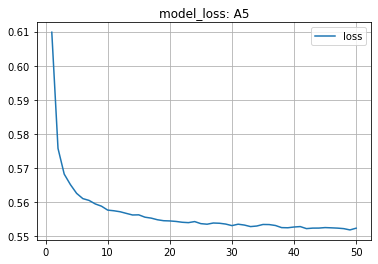

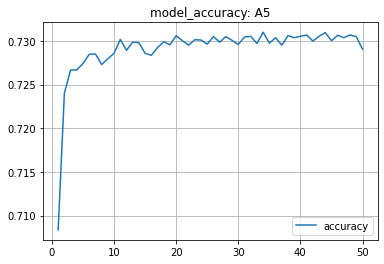

In [69]:
model_plot = pd.DataFrame(fit_model_A5.history, index=range(1, len(fit_model_A5.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A5")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A5")

In [70]:
print("Alternative Model 6 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A6.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 6 Results
268/268 [==============================] - 0s 610us/step - loss: 0.5606 - accuracy: 0.7266
Loss: 0.5606260299682617, Accuracy: 0.7266472578048706


<AxesSubplot:title={'center':'model_accuracy: A6'}>

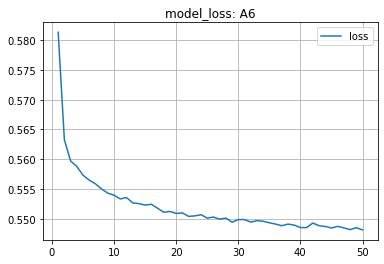

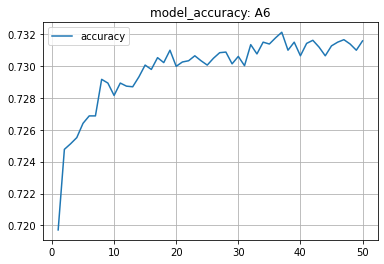

In [71]:
model_plot = pd.DataFrame(fit_model_A6.history, index=range(1, len(fit_model_A6.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A6")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A6")

In [72]:
print("Alternative Model 7 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A7.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 7 Results
268/268 [==============================] - 0s 543us/step - loss: 0.5613 - accuracy: 0.7264
Loss: 0.5612891912460327, Accuracy: 0.7264139652252197


<AxesSubplot:title={'center':'model_accuracy: A7'}>

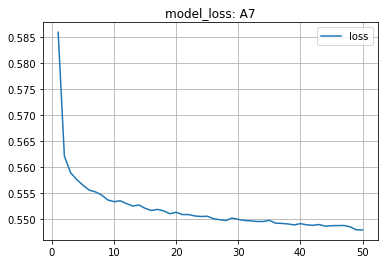

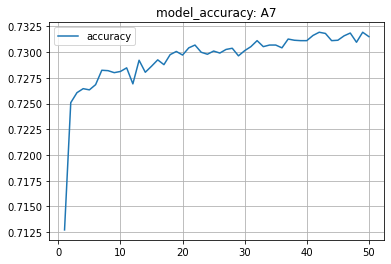

In [73]:
model_plot = pd.DataFrame(fit_model_A7.history, index=range(1, len(fit_model_A7.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A7")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A7")

In [74]:
print("Alternative Model 8 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A8.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 8 Results
268/268 [==============================] - 0s 528us/step - loss: 0.5596 - accuracy: 0.7273
Loss: 0.5596069693565369, Accuracy: 0.7273469567298889


<AxesSubplot:title={'center':'model_accuracy: A8'}>

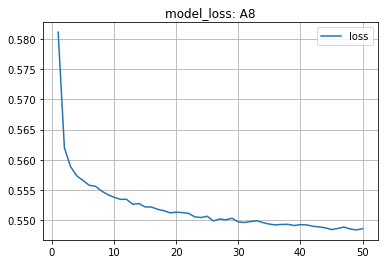

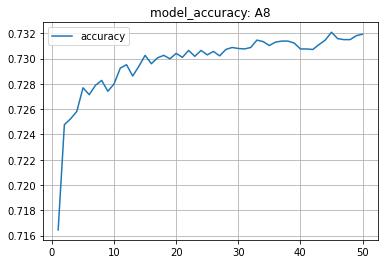

In [75]:
model_plot = pd.DataFrame(fit_model_A8.history, index=range(1, len(fit_model_A8.history["loss"]) + 1))
model_plot.plot(y="loss", grid=True, title="model_loss: A8")
model_plot.plot(y="accuracy", grid=True, title="model_accuracy: A8")

In [76]:
print("Alternative Model 9 Results")
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A9.evaluate(X_test_scaled,y_test,verbose=1)
# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 9 Results
268/268 [==============================] - 0s 541us/step - loss: 0.5597 - accuracy: 0.7271
Loss: 0.5597354173660278, Accuracy: 0.7271137237548828


<AxesSubplot:title={'center':'model_accuracy: A9'}>

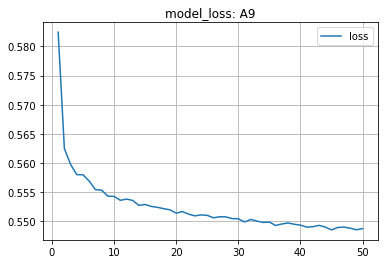

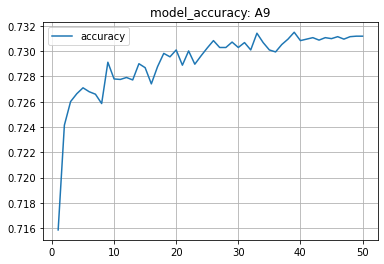

In [77]:
model_plot = pd.DataFrame(fit_model_A9.history, index=range(1, len(fit_model_A9.history["loss"]) + 1))
model_plot.plot(y="loss", title="model_loss: A9", grid=True)
model_plot.plot(y="accuracy", title="model_accuracy: A9", grid=True)

### Step 3: Save each of your alternative models as an HDF5 file.


In [78]:
# Set the file path for the fifth alternative model
file_path = Path("./Resources/AlphabetSoup_A5.h5")
# Export your model to a HDF5 file
nn_A5.save(file_path)

In [79]:
# Set the file path for the sixth alternative model
file_path = Path("./Resources/AlphabetSoup_A6.h5")
# Export your model to a HDF5 file
nn_A6.save(file_path)

In [80]:
# Set the file path for the seventh alternative model
file_path = Path("./Resources/AlphabetSoup_A7.h5")
# Export your model to a HDF5 file
nn_A7.save(file_path)

In [81]:
# Set the file path for the eighth alternative model
file_path = Path("./Resources/AlphabetSoup_A8.h5")
# Export your model to a HDF5 file
nn_A8.save(file_path)

In [82]:
# Set the file path for the ninth alternative model
file_path = Path("./Resources/AlphabetSoup_A9.h5")
# Export your model to a HDF5 file
nn_A9.save(file_path)